### Full Name : Parsa Ghezelbash
### Student Number : 401110437


# CART Algorithm Implementation with MNIST Dataset

## Goal
The objective is to implement the Classification and Regression Trees (CART) algorithm from scratch and apply it to the MNIST dataset. After completing the implementation, you will compare its performance with scikit-learn's `DecisionTreeClassifier` and analyze the results through visualizations.

## Part 1: Data Preparation and Exploration

1. **Data Normalization**  
   - Normalize the data using **z-score normalization** to ensure that each feature has a mean of 0 and a standard deviation of 1.

2. **Data Visualization**
   a. Display 10 sample images from the **training set**, **validation set**, and **test set**.  
   b. Create a **histogram** showing the distribution of labels across the **training set**, **validation set**, and **test set**.

In [ ]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt
import numpy as np

def prepare_data(batch_size=64, train_ratio=0.8):
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0, ), (1, ))
    ])

    full_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

    train_size = int(len(full_dataset) * train_ratio)
    val_size = len(full_dataset) - train_size
    train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

    test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    return train_loader, val_loader, test_loader

In [ ]:
def explore_data(data_loader):
    # Get a batch of data
    images, labels = next(iter(data_loader))
    # Plot sample images
    batch_size = 4
    fig, axes = plt.subplots(1, batch_size, figsize=(5, 20))
    for ax, image, label in zip(axes, images[:batch_size], labels[:batch_size]):
        ax.imshow(image[0], cmap='gray')
        ax.set_title(f'label = {label}')
        ax.axis('off')
    plt.tight_layout()
    plt.show()
    # Plot label distribution
    plt.hist(labels.numpy(), color='blue', bins=20, alpha=0.8)
    plt.title('Labels Distribution')
    plt.xlabel('label')
    plt.ylabel('frequencies')
    plt.show()

In [ ]:
train_loader, val_loader, test_loader = prepare_data()


Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 9.91M/9.91M [00:00<00:00, 17.7MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 28.9k/28.9k [00:00<00:00, 492kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 1.65M/1.65M [00:00<00:00, 4.37MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 4.54k/4.54k [00:00<00:00, 7.47MB/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
input, label = next(iter(train_loader))
input[:2][0][0].view(-1).shape

torch.Size([784])

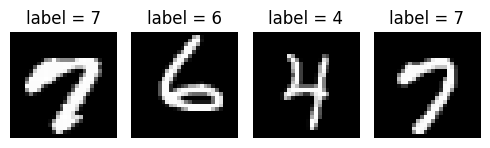

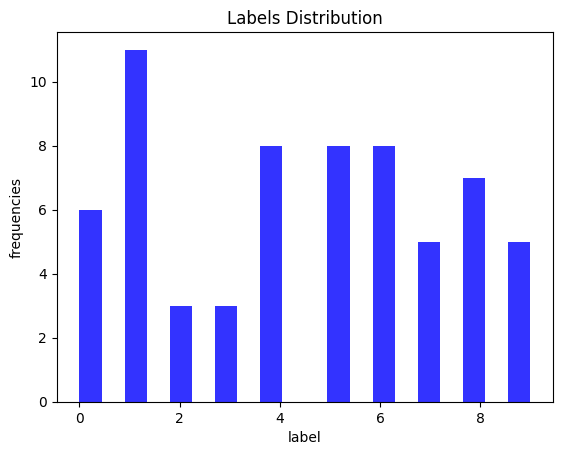

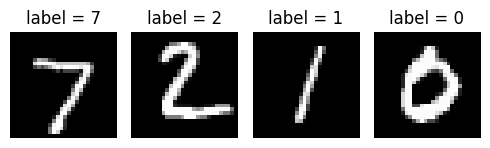

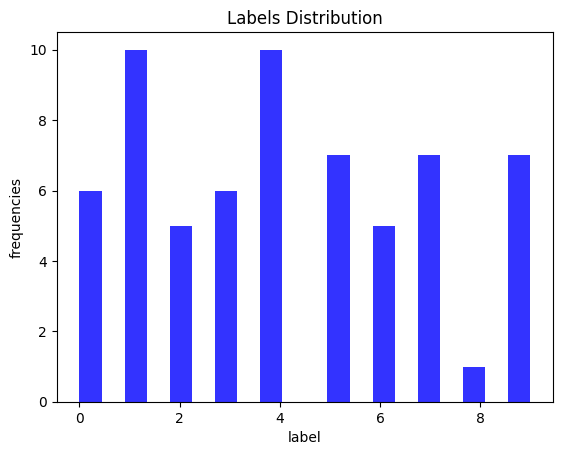

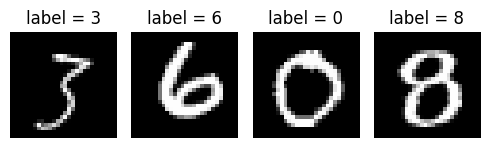

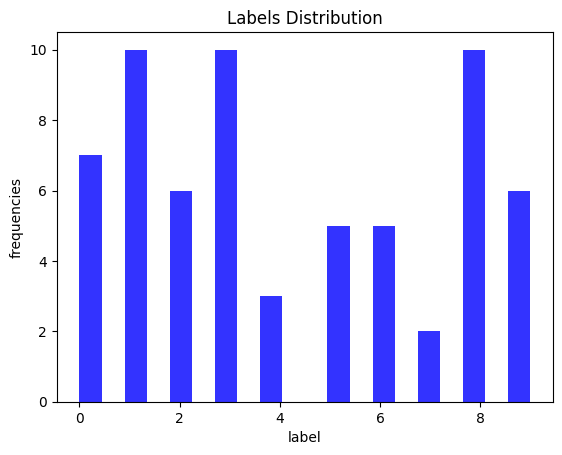

In [ ]:
train_loader, val_loader, test_loader = prepare_data()
explore_data(train_loader)
explore_data(test_loader)
explore_data(val_loader)

Prepare the data for use with the CART algorithm by flattening the images.

In [ ]:
def prepare_data_for_cart(data_loader):
    all_images = []
    all_labels = []
    for images, labels in data_loader:
        all_images.append(images.view(images.size(0), -1))
        all_labels.append(labels)

    return torch.cat(all_images, dim=0), torch.cat(all_labels, dim=0)

In [ ]:
X_train, y_train = prepare_data_for_cart(train_loader)
X_val, y_val = prepare_data_for_cart(val_loader)
X_test, y_test = prepare_data_for_cart(test_loader)

In [ ]:
y, c = y_train.unique(return_counts=True)
p = c / c.sum()
(p*p).sum().item()
# X_train[:, 0].mean(dim=1)
x = torch.tensor([[1, 2, 3, 4],
                  [10, 11, 12, 13]])
x.float()[:, 0].mean()
type(y_train.shape[0])
z = 1, 2, 3
z = [1, 2, z]
z

[1, 2, (1, 2, 3)]

## Part 2: CART Algorithm Implementation

1. Implement the CART algorithm from scratch, including:
   a. Node class to represent tree nodes
   b. DecisionTree class with the following methods:
      - `fit(X, y)`: Train the decision tree
      - `predict(X)`: Make predictions on new data
      - `_build_tree(X, y, depth)`: Recursively build the tree
      - `_find_best_split(X, y)`: Find the best feature and threshold for splitting
      - `_calculate_gini_impurity(y)`: Calculate Gini impurity for a set of labels
2. Your implementation should support the following hyperparameters:
   - `max_depth`: Maximum depth of the tree
   - `min_samples_split`: Minimum number of samples required to split an internal node

Note: Feel free to change, add, and remove functions.

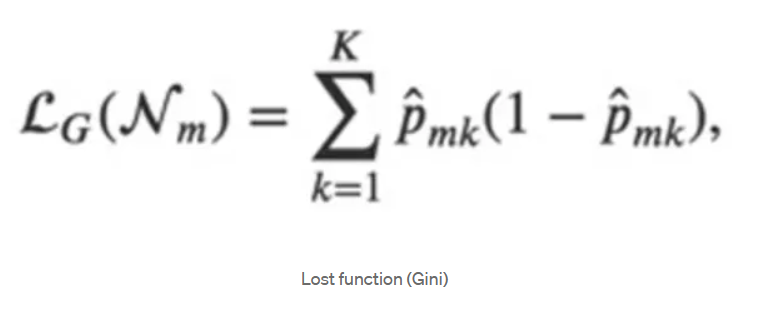

In [ ]:
class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

class DecisionTree_CART:
    def __init__(self, max_depth=10, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.root = None

    def fit(self, X, y):
        self.root = self._build_tree(X, y)

    def _build_tree(self, X, y, depth=0):
        # Implement recursive tree building here
        feature, threshold, gini, X_left, y_left, X_right, y_right = self._find_best_split(X, y)
        node = Node(feature=feature, threshold=threshold)
        if depth == self.max_depth:
            y_unique, counts = y.unique(return_counts=True)
            node.value = y_unique[torch.argmax(counts)]
            return node
        node.left = self._build_tree(X_left, y_left, depth=depth+1)
        node.right = self._build_tree(X_right, y_right, depth=depth+1)
        return node

    def _find_best_split(self, X, y):
        # Implement best split finding here
        threshold, gini, X_left, y_left, X_right, y_right = self._get_split_gini(X, y, 0)
        best_split = [0, threshold, gini, X_left, y_left, X_right, y_right]
        for feature in range(1, X.shape[1]):
            threshold, gini, X_left, y_left, X_right, y_right = self._get_split_gini(X, y, feature)
            if gini < best_split[2]:
                best_split = [feature, threshold, gini, X_left, y_left, X_right, y_right]
        return best_split

    def _get_split_gini(self, X, y, feature):
        threshold = X[:, feature].mean()
        X_left, y_left, X_right, y_right = self._get_split(X, y, feature, threshold)
        gini_left = self._gini_impurity(y_left)
        gini_right = self._gini_impurity(y_right)
        gini = (y_left.shape[0] * gini_left + y_right.shape[0] * gini_right) / y.shape[0]
        return threshold, gini, X_left, y_left, X_right, y_right

    def _get_split(self, X, y, feature, threshold):
        X_left, y_left = X[X[:, feature] <= threshold], y[X[:, feature] <= threshold]
        X_right, y_right = X[X[:, feature] > threshold], y[X[:, feature] > threshold]
        return X_left, y_left, X_right, y_right

    def _gini_impurity(self, y):
        # Implement Gini impurity calculation here
        unique_y, counts = y.unique(return_counts=True)
        p = counts / counts.sum()
        return 1 - (p*p).sum().item()

    def predict(self, X):
        # Implement prediction here
        predictions = []
        for x in X:
            node = self.root
            while node.value == None:
                if x[node.feature] > node.threshold:
                    node = node.right
                else:
                    node = node.left
            predictions.append(node.value)
        return torch.tensor(predictions)

## Part 3: Model Evaluation and Comparison

1. Train your CART implementation on the MNIST training data.
2. Evaluate your model's performance on the test set and report the accuracy.
3. Train scikit-learn's DecisionTreeClassifier on the same data.
4. Compare the performance of your implementation with scikit-learn's version.
5. Create a plot showing how accuracy changes with tree depth for both implementations.

In [ ]:
tree = DecisionTree_CART(max_depth=5)
tree.fit(X_train, y_train)

predictions = tree.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print(f'DecisionTree_CART accuracy: {accuracy_score(predictions, y_test)}')

DecisionTree_CART accuracy: 0.6414


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=5)
dtc.fit(X_train, y_train)
dtc_predictions = dtc.predict(X_test)

In [ ]:
print(f'sklearn DecisionTreeClassifier accuracy: {accuracy_score(dtc_predictions, y_test)}')

sklearn DecisionTreeClassifier accuracy: 0.682


In [ ]:
depth_choices = range(1, 11)
tree_accuraceis = {}
dtc_accuracies = {}
for max_depth in depth_choices:
    tree = DecisionTree_CART(max_depth=max_depth)
    tree.fit(X_train, y_train)
    tree_accuraceis[max_depth] = accuracy_score(tree.predict(X_test), y_test)

    dtc = DecisionTreeClassifier(max_depth=max_depth)
    dtc.fit(X_train, y_train)
    dtc_accuracies[max_depth] = accuracy_score(tree.predict(X_test), y_test)

In [ ]:
plt.plot(depth_choices, list(tree_accuraceis.values()), color='green', marker='o')
plt.plot(depth_choices, list(dtc_accuracies.values()), color='red', marker='o')
plt.title('DecisionTree_CART vs sklearn DecisionTreeClassifier')
plt.ylabel('accuracy')
plt.xlabel('max depth')
plt.legend(['DecisionTree_CART', 'sklearn DecisionTreeClassifier'])

## Question
What is the difference between ID3 and CART algorithm

### ID3 algorithm uses information gain but CART uses Gini impurity.